In [1]:
import numpy as np
from hmm_utils import HMM
from smoothing_state_attacker import ss_attacker
from extra import monte_carlo_enumeration
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
#HMM A , B, pi

priors     = np.array([0.5,0.3,0.2])
transition = np.array([[0.85, 0.05,0.1],
                       [0.05, 0.9,0.05],
                        [1/2, 1/4, 1/4]])
emission   = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                    [0.1, 0.1, 0.1, 0.1, 0.1, 0.5],
                       [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])

x_vector = np.array([ [5], [3], [4], [3], [5]])


In [8]:
# initialize HMM
hmm = HMM(n_components=3,n_obs=6)
hmm.startprob_ = priors
hmm.transmat_ = transition
hmm.emissionprob_ = emission

In [9]:
def linspace(start, stop, step=1.):
  """
    Like np.linspace but uses step instead of num
    This is inclusive to stop, so if start=1, stop=3, step=0.5
    Output is: array([1., 1.5, 2., 2.5, 3.])
  """
  return np.linspace(start, stop, int((stop - start) / step + 1))


In [ ]:
def ratio_plot(X, hmm, t_ , state_ , c_, k_value_, N_ite ,initial_ratio, final_ratio, ratio_step):
    ## ratio plots
    Z_set = hmm.generate_z(len(X))
    f1_attacker = ss_attacker(w1 = 1 ,w2= 0 ,t = t_, state= state_ ,c=c_)
    f2_attacker = ss_attacker(w1 = 0 ,w2= 1 ,t = t_, state= state_ ,c=c_)
    f1_utilities = monte_carlo_enumeration(hmm, k_value = k_value_, attacker = f1_attacker, N= N_ite, x_vector =X)[1]
    f2_utilities = monte_carlo_enumeration(hmm,k_value = k_value_,attacker= f2_attacker, N= N_ite, x_vector = X)[1]
    diff_list = []
    ratio_list = []
    for r in range(int(final_ratio/initial_ratio)):
        utility_vector = initial_ratio * f1_utilities + f2_utilities
        max_indx = np.argmax(utility_vector)
        z_star = Z_set[max_indx]
        y_vec =  hmm.attack_X(x_vector.reshape(5,1), np.ones([len(x_vector),6]),z_star).astype('int')
        compute_prob_att = ss_attacker(w1 = initial_ratio ,w2= 1,t = t_, state=state_ ,c=c_)
        p_untainted_data = compute_prob_att.state_attraction_repulsion_f1(alpha = hmm.alpha(x_vector), beta = hmm.beta(x_vector))
        p_tainted_data = compute_prob_att.state_attraction_repulsion_f1(alpha = hmm.alpha(y_vec), beta = hmm.beta(y_vec))
        ratio_list.append(initial_ratio)
        diff_list.append(abs(p_tainted_data - p_untainted_data))
        initial_ratio+=ratio_step
    
    plt.plot(ratio_list, diff_list, label = 's= '+ str(state_) + ',t='+  str(t_))
    plt.xlabel('Ratio (w1/w2)',)
    plt.ylabel('Difference in prob')
    plt.title('c = ' + str(c_) +',t = ' +  str(t_)  + ',N_ite=' + str(N_ite)  + ',k=' +  str(k_value_))

We see that the difference (absolute values) between prob. with tainted data and untainted data increased in a step fashion for attraction and repulsion. We are considering the cases where all the attacks have succesfl prob. =1  and varaince is almost 0 (precision $k$ very high).

### Attraction

#### t = 1

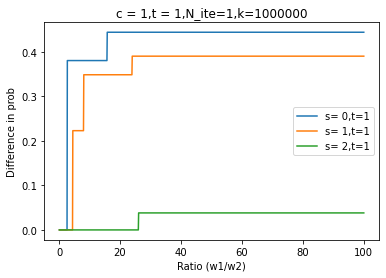

In [14]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 1 , 
               state_ = st , c_ =1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)
    plt.legend()

#### t = 2

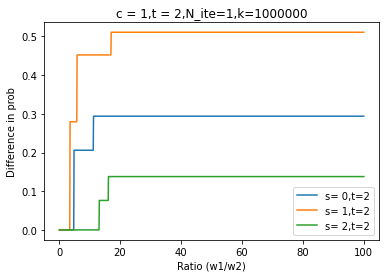

In [15]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 2 , 
               state_ = st , c_ =1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)
    plt.legend()

#### t  = 3

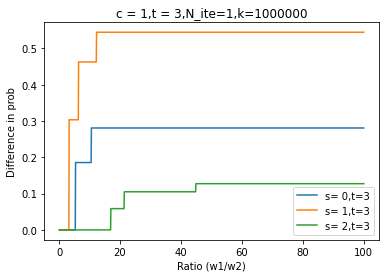

In [16]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 3 , 
               state_ = st , c_ =1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)
    plt.legend()

#### t = 4

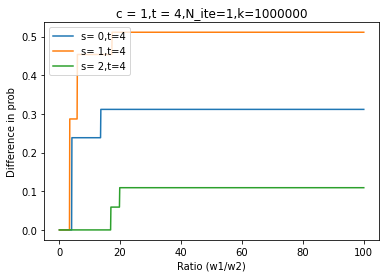

In [17]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 4 , 
               state_ = st , c_ =1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)
    plt.legend()

#### t = 5

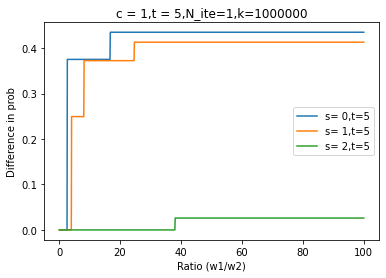

In [18]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 5 , 
               state_ = st , c_ =1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)
    plt.legend()

### Repulsion

#### t = 1

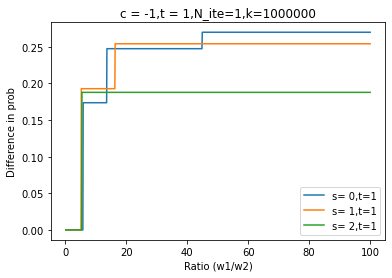

In [19]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 1 , 
               state_ = st , c_ = -1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)
    plt.legend()

#### t = 2

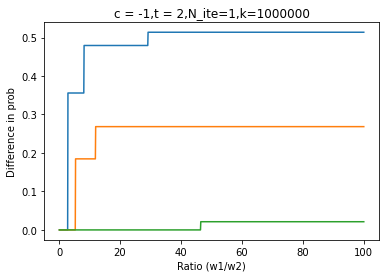

In [20]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 2 , 
               state_ = st, c_ = -1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)

#### t = 3

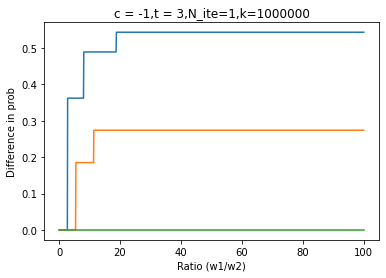

In [21]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 3 , 
               state_ = st, c_ = -1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)

#### t = 4

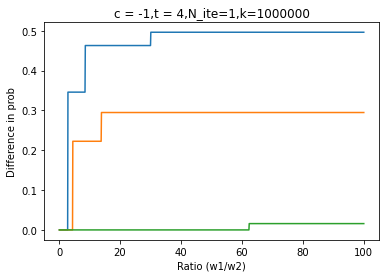

In [22]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 4 , 
               state_ = st, c_ = -1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)

#### t = 5

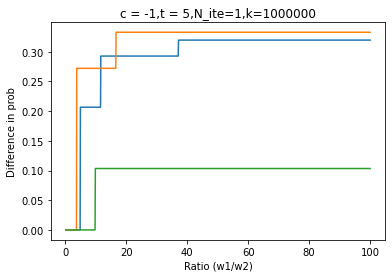

In [23]:
for st in range(hmm.n_components):
    ratio_plot(X = x_vector, hmm = hmm, t_ = 5 , 
               state_ = st, c_ = -1,
               k_value_ = 1000000, N_ite = 1 ,
               initial_ratio = 0.1, final_ratio = 100 , ratio_step = 0.1)